# Code selection

# Main string description

Given N - 1 colored symbols describing  a curve in space $\vec{\mathbf{X_n}}$, created by a single array of complex numbers $Z_n$ created recursively. 

$$\vec{\mathbf{X_n}}=(u_n,v_n,w_n)$$

Considering:
$$n  \in \space \mathbb{N}_0$$

$$T_o  \in \space \mathbb{Q}$$


We have

$$
r_k=
\begin{cases}
0 &  k  < 0 \\
r_{k-1}+\Delta r_o & \space k \geq 0 \text{ and } k \equiv 0 \pmod{M} \\
r_{k-1} & \space   k > 0 \text{ and } k \not\equiv 0 \pmod{M}
\end{cases}
$$
$$k  \in \space \mathbb{Z}$$


So :

$$\omega=e^{\frac{2\pi i}{T_o}}$$

$$Z_n=r_n\omega^n$$

## Coloring

The color $C_n$ in these examples is based on  "hsv" or "coolwarm" colormaps with $M_c$ colors:

$$C_n \equiv n \pmod{M_{c}}$$

## Coordinates
And cartesian coordinates for the sequences describing a curve in space:
$$\vec{\mathbf{X_n}}=(u_n,v_n,w_n)$$


$$\Omega_o=\frac{2\pi }{T_o}$$



$$u_n=\frac{1}{2}(Z_n+\overline{Z_n})=r_n cos(\Omega_o n)$$

$$v_n=\frac{1}{2i}(Z_n-\overline{Z_n})=r_n sin(\Omega_o n)$$

$$w_n=log_{b}(|Z_n|)$$

We have an analogous way to see that:


$$Z_n=u_n+iv_n$$

$$\overline{Z_n}=u_n-iv_n$$

$$u_n=\frac{1}{2}(Z_n+\overline{Z_n})=r_n cos(\Omega_o n)$$

$$v_n=\frac{1}{2i}(Z_n-\overline{Z_n})=r_n sin(\Omega_o n)$$

$$w_n=cos \left( \frac{2 \pi}{\lambda} \space log_{b}(|Z_n|)\right)$$

$$\lambda = 1/K$$


Leibniz about time : "For my part, I have said several times that I hold space to be something merely relative, as time is, taking space to be an order of coexistences, as time is an order of successions. For space indicates... an order of things existing at the same time, considered just as existing together, without bringing in any details about what they are like. When we see a number of things together, one becomes aware of this order among them."
https://philosophy.stackexchange.com/questions/3134/is-spacetime-a-compound-substance-in-liebnizs-monadology?rq=1

In [328]:
#import all_functions  as cf
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display
from matplotlib import cm
#We like black background
plt.rcParams.update({
        "lines.color": "black",
        "patch.edgecolor": "black",
        "text.color": "white",
        "axes.facecolor": "black",
        "axes.edgecolor": "black",
        "axes.labelcolor": "black",
        "xtick.color": "black",
        "ytick.color": "black",
        "grid.color": "black",
        "figure.facecolor": "black",
        "figure.edgecolor": "black",
        "savefig.facecolor": "black",
        "savefig.edgecolor": "black"})
def generate_curve(N, M, Delta_r_o, T_o):
    omega = np.exp(2*np.pi*1j/T_o)
    r = np.zeros(N)
    for k in range(N):
        if k % M == 0:
            r[k] = r[k-1] + Delta_r_o
        else:
            r[k] = r[k-1]
    Z = r * omega**np.arange(N)
    return Z

def cartesian_coordinates(Z):
    u = np.real(Z)
    v = np.imag(Z)
    w = np.log(np.abs(Z))/np.log(2)
    return u, v, w



def plot_curve(u, v, w, line=False, scatt=True, figsize=(16, 16), M_color=12, axis_on=False,
               axis_color='black', axis_text_color='white', axis_line_color='white', axis_tick_color='white',cmap='hsv',show_plt=True):
   
    fig = plt.figure(figsize=figsize)
    ax = fig.add_subplot(111, projection='3d')
    colors = np.arange(len(u)) % M_color / M_color  # Generate colors based on index mod M_color
    get_color = plt.get_cmap(cmap, M_color)
    
    if line:
        ax.plot(u, v, w, color="gray")  # You can customize the line color here

    if scatt:
        ax.scatter(u, v, w, c=get_color(np.arange(len(u)) % M_color)) # Use colors for scatter plot

    if axis_on:
        ax.axis('on')
        ax.xaxis.set_pane_color(axis_color)
        ax.yaxis.set_pane_color(axis_color)
        ax.zaxis.set_pane_color(axis_color)
        ax.xaxis._axinfo['grid'].update(color=axis_line_color, linestyle='-', linewidth=1)
        ax.yaxis._axinfo['grid'].update(color=axis_line_color, linestyle='-', linewidth=1)
        ax.zaxis._axinfo['grid'].update(color=axis_line_color, linestyle='-', linewidth=1)
        ax.xaxis.set_tick_params(colors=axis_tick_color)
        ax.yaxis.set_tick_params(colors=axis_tick_color)
        ax.zaxis.set_tick_params(colors=axis_tick_color)
        ax.xaxis.label.set_color(axis_text_color)
        ax.yaxis.label.set_color(axis_text_color)
        ax.zaxis.label.set_color(axis_text_color)
        ax.title.set_color(axis_text_color)

    else:
        ax.axis('off')

    if show_plt==True:
        plt.show()


phi=0.5*(1+np.sqrt(5))



# $\Omega_o=\frac{2 \pi}{4}$ $M=T_o=4$ $\lambda=0.9$ 

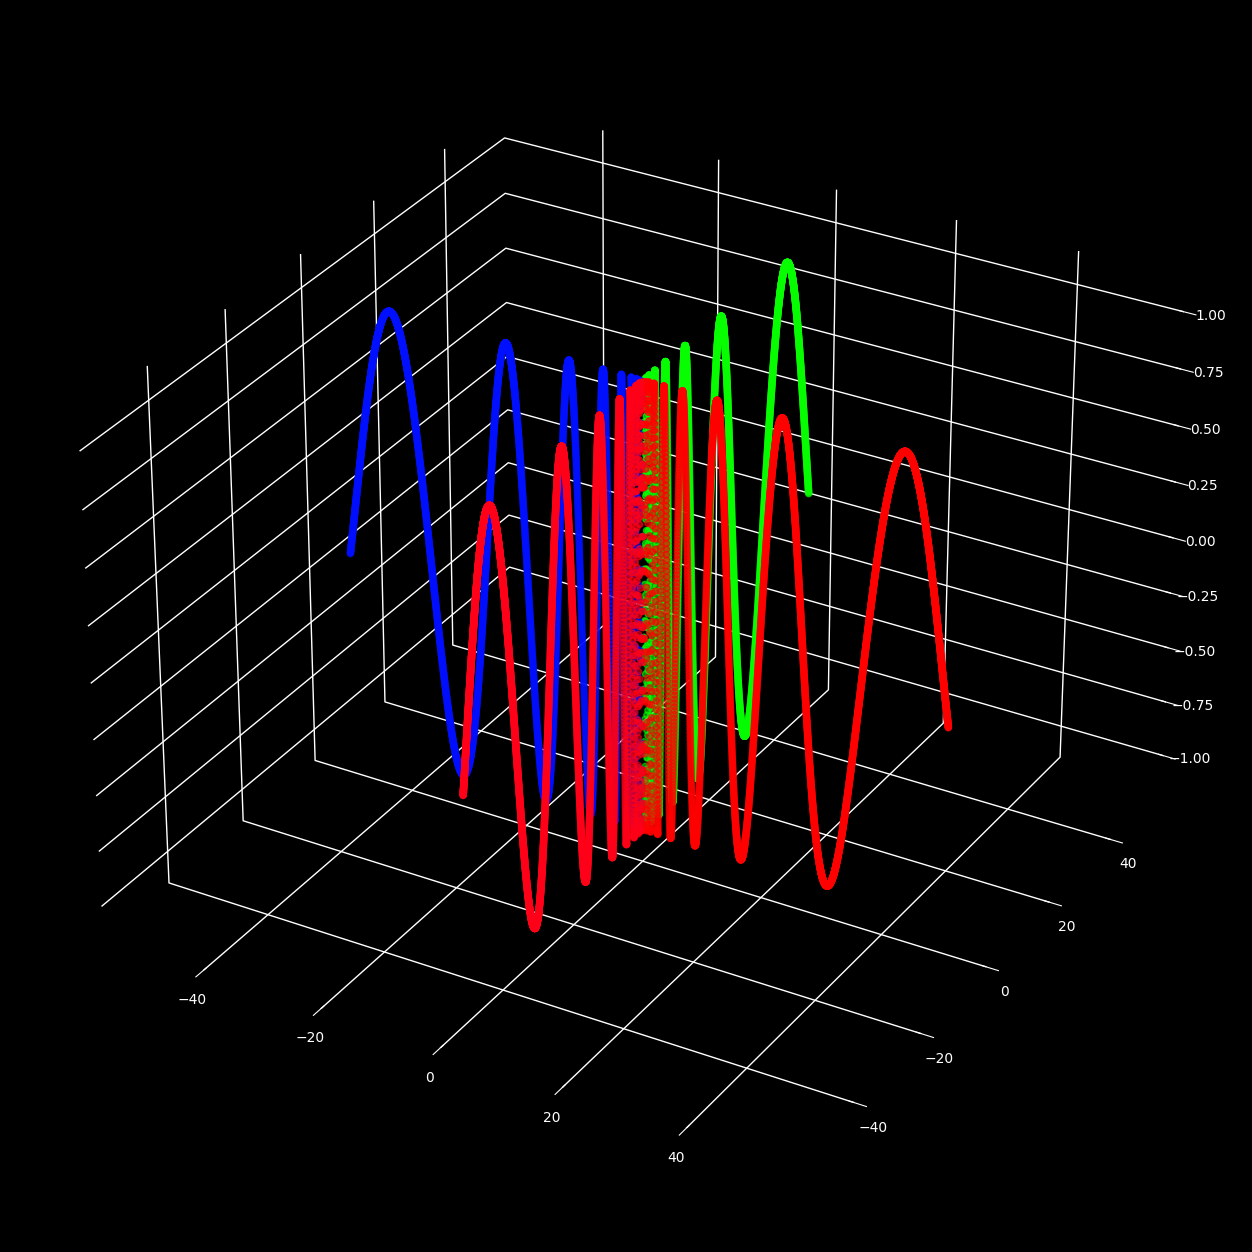

In [329]:
N = 5000*4
M = 4
wlength=0.9
K=1/wlength #(wave number)
Delta_r_o = 0.01

T_o=M
Z = generate_curve(N, M, Delta_r_o, T_o)
u, v, w = cartesian_coordinates(Z)


plot_curve(u, v, np.cos(2*np.pi*K*w),axis_on=True,line=False,M_color=M,cmap='hsv')


# $\Omega_o=\frac{2 \pi}{39}$ $M=T_o=39$ $\lambda=0.8$ 

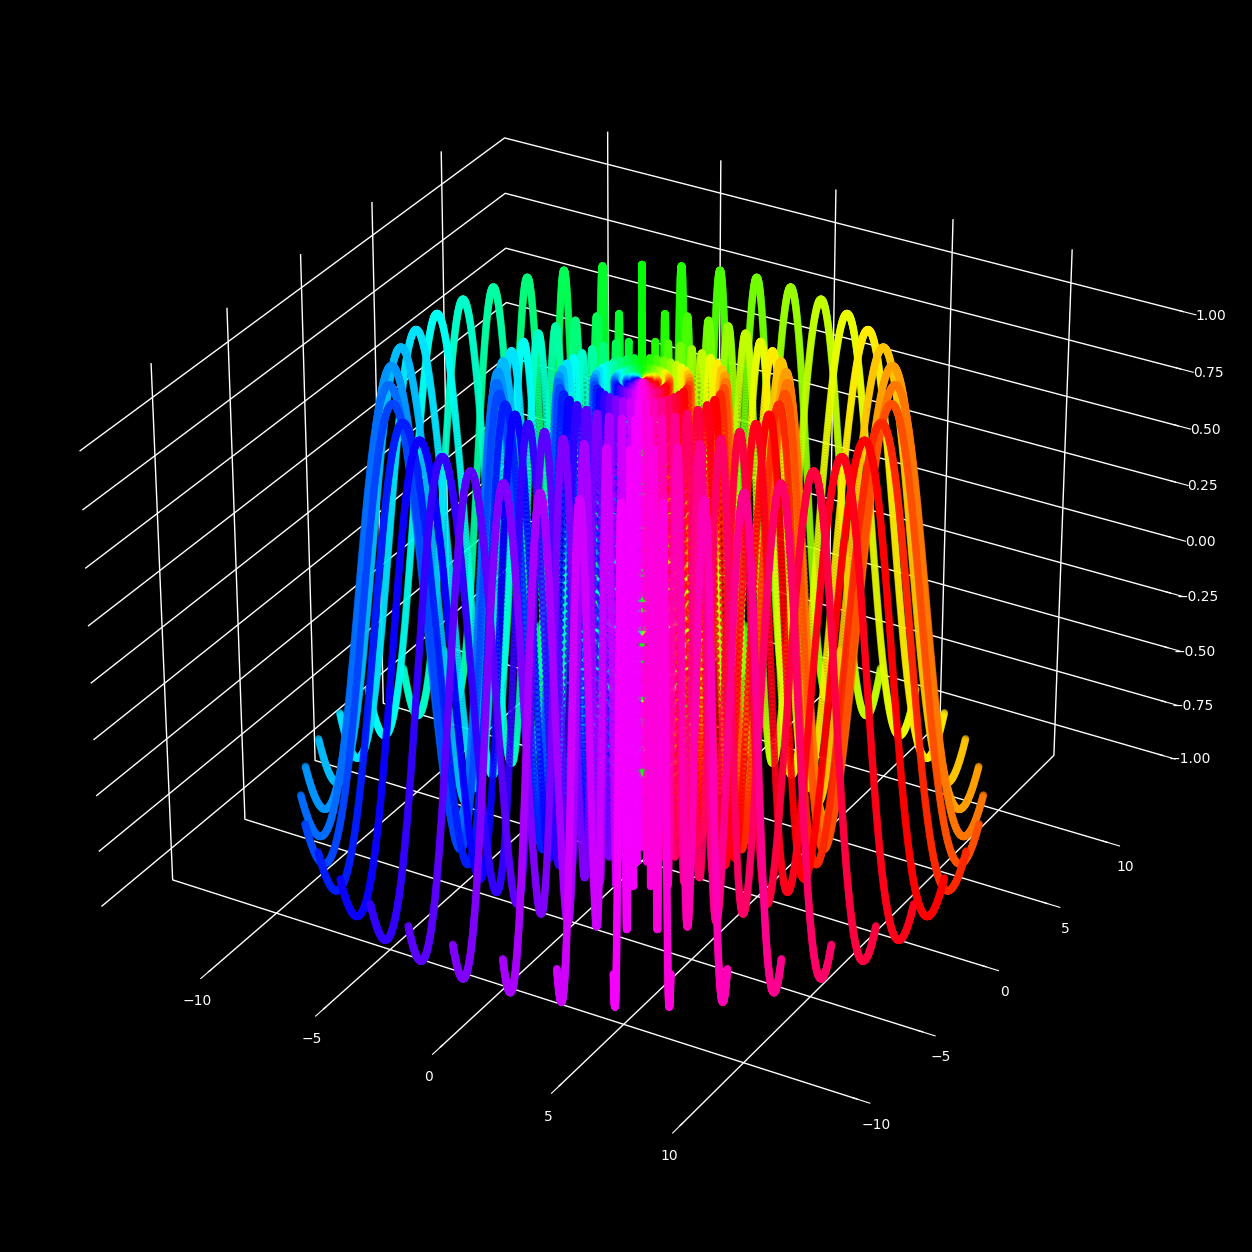

In [330]:
N = 50000
M = 39
wlength=0.8
K=1/wlength #(wave number)
Delta_r_o = 0.01

T_o=M
Z = generate_curve(N, M, Delta_r_o, T_o)
u, v, w = cartesian_coordinates(Z)


plot_curve(u, v, np.cos(2*np.pi*K*w),axis_on=True,line=False,M_color=M,cmap='hsv')


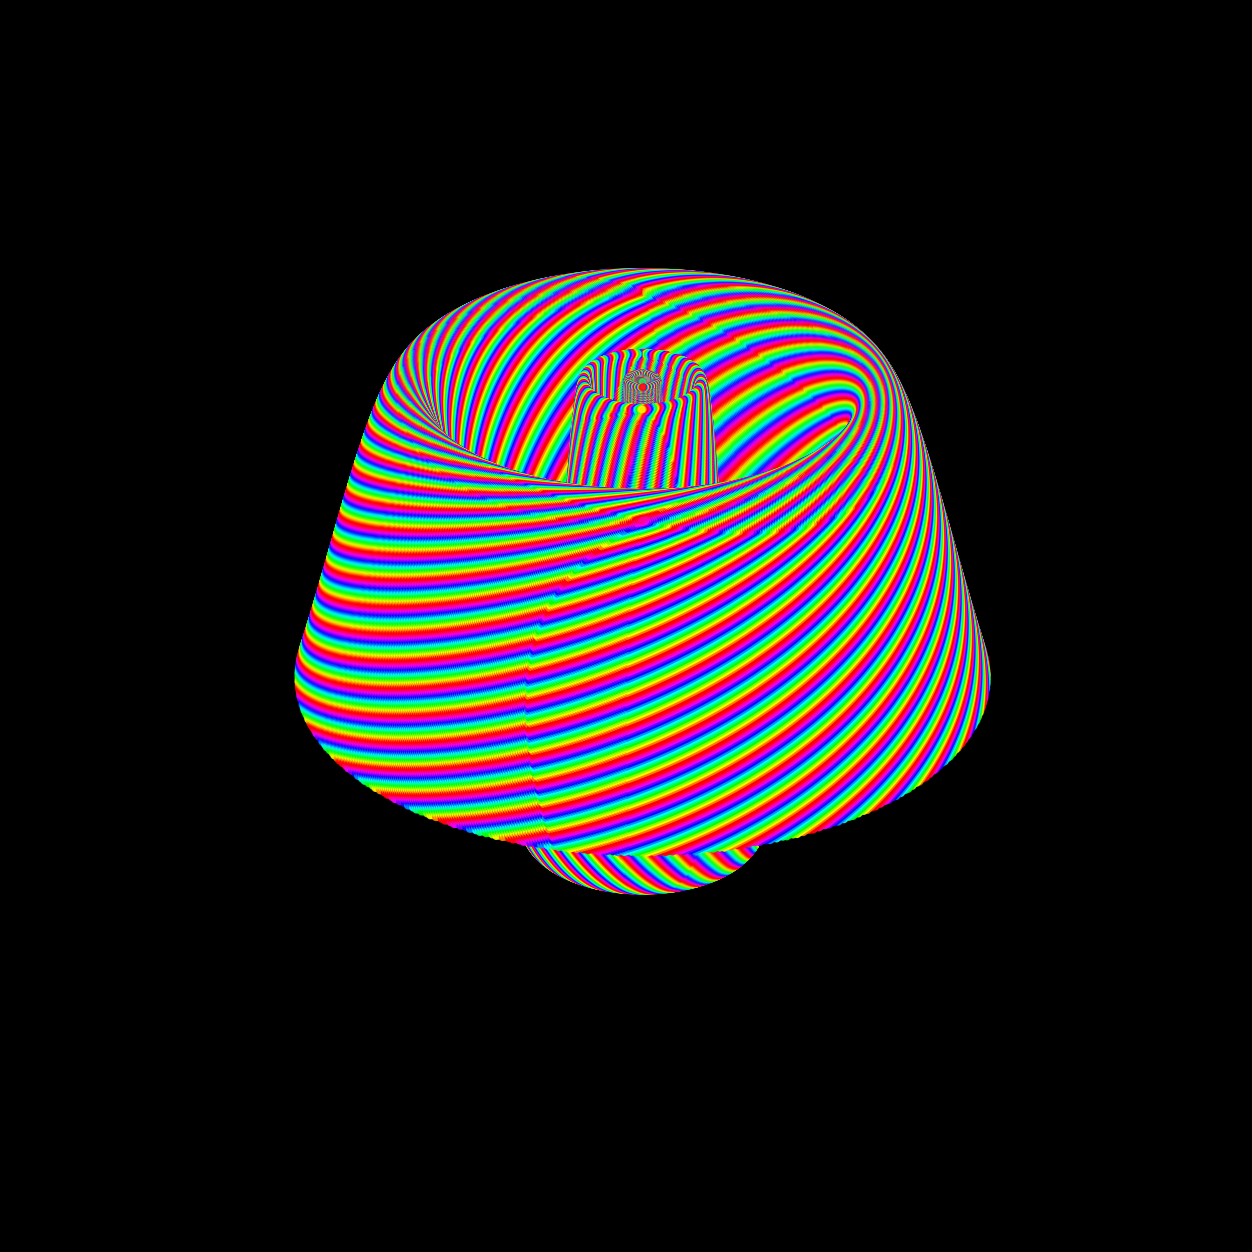

In [349]:
N = 500000
M = 13
wlength=2
K=1/wlength #(wave number)
Delta_r_o = 0.01

T_o=phi
Z = generate_curve(N, M, Delta_r_o, T_o)
u, v, w = cartesian_coordinates(Z)


plot_curve(u, v, np.cos(2*np.pi*K*w),axis_on=False,line=False,M_color=M,cmap='hsv')


# Map orbits $X_{n+1}\equiv(K+1) X_{n} \pmod{K}$  for $K=1$
https://mathworld.wolfram.com/2xmod1Map.html

$$X_{n+1}\equiv(K+1) X_{n} \pmod{K}$$ 

$$ X_{0}=\frac{p}{q} \in \mathbb{Q}  \space [0,1]$$

In [332]:
import matplotlib.pyplot as plt

def compute_orbits(p, q, K, num_iterations,delta=1*10**(-15)):
    # Initial value
    X_0 = p / q
    orbits = [X_0]
    
    # Compute the sequence
    X = np.zeros(num_iterations)
    X[0]=p/q
    for n in np.arange(1,num_iterations):
        X[n] = (K + 1+delta) * X[n-1] % K
        #orbits.append(X_n)
    
    return X #orbits

def plot_orbits(orbits):
    plt.figure(figsize=(10, 6))
    plt.plot(orbits, marker='o')
    plt.title('Map Orbit ')
    plt.xlabel('Iteration')
    plt.ylabel('X_n')
    plt.grid(True)
    plt.show()



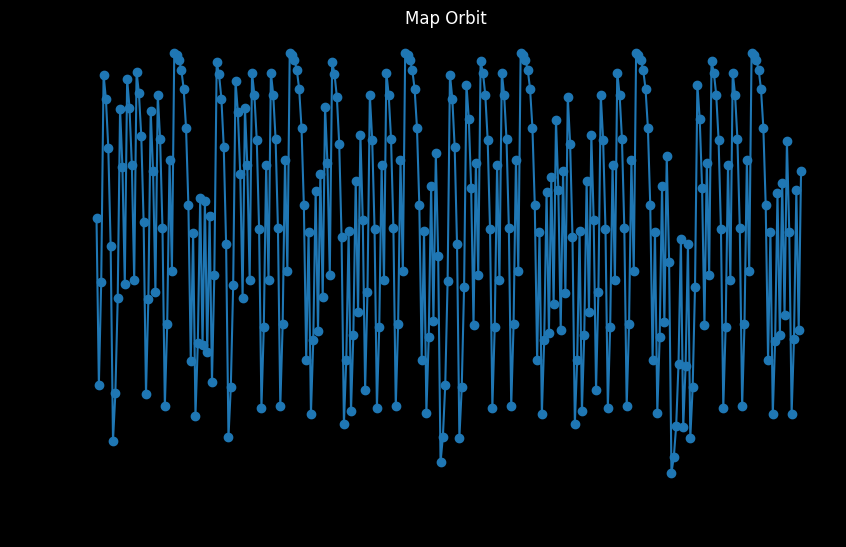

In [333]:

# Example parameters
p = (phi-1)
q = 1
K = 1
num_iterations = 60*5


# Compute and plot the orbits
orbits = compute_orbits(p, q, K, num_iterations)
plot_orbits(orbits)

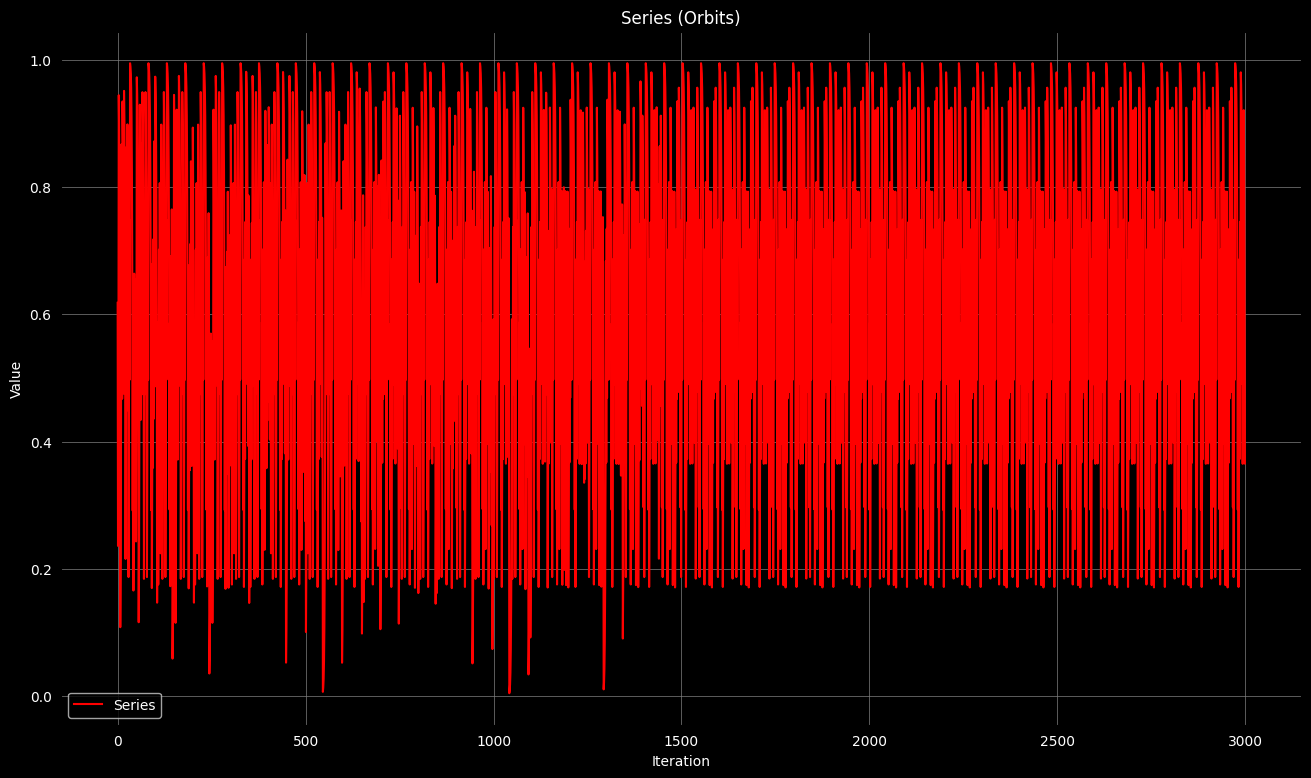

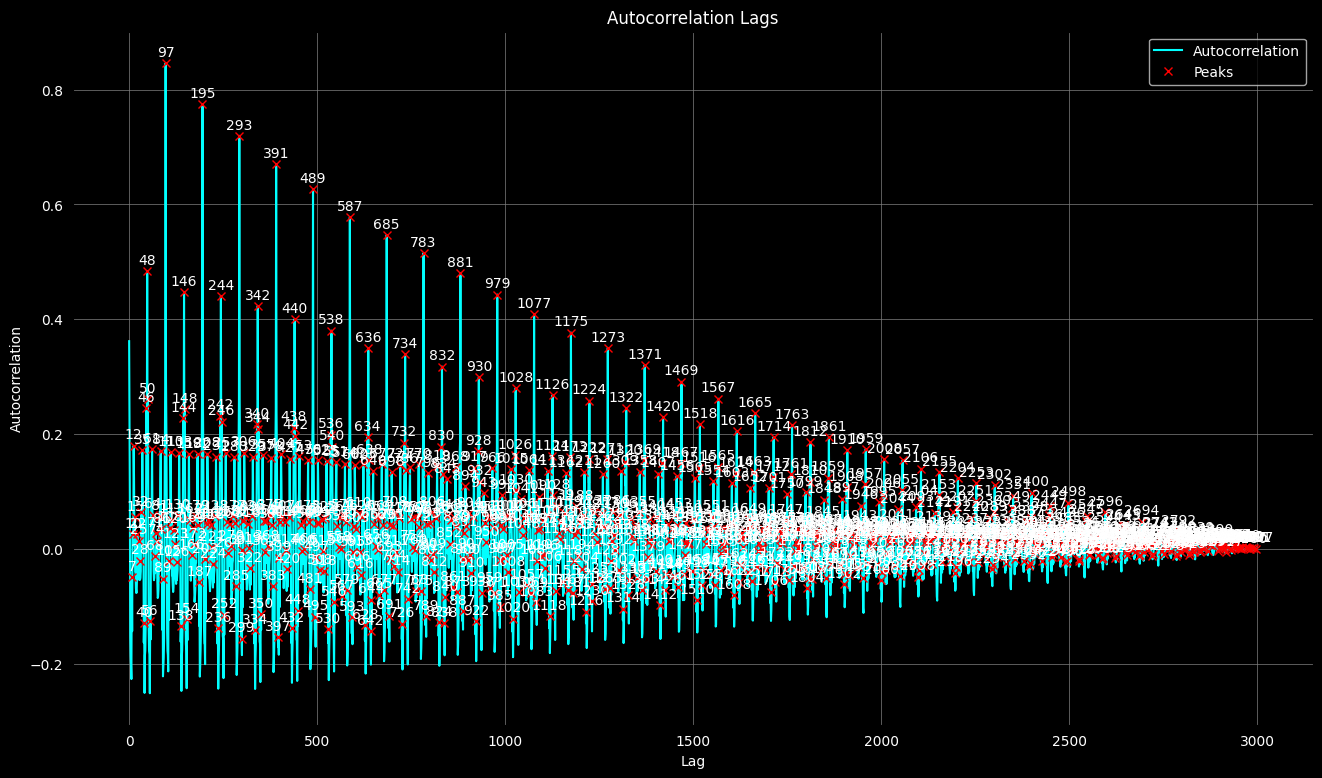

In [342]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

def plot_autocorrelation_with_peaks(p=0.5*(1+np.sqrt(5))-1, q=1, K=1, num_iterations=60*5, delta=1*10**(-15)):
    def compute_orbits(p, q, K, num_iterations, delta):
        # Initial value
        X_0 = p / q
        orbits = [X_0]
        
        # Compute the sequence
        X = np.zeros(num_iterations)
        X[0] = X_0
        for n in range(1, num_iterations):
            X[n] = (K + 1 + delta) * X[n-1] % K
            orbits.append(X[n])
        
        return X, compute_autocorrelation_lags(X)
    
    def compute_autocorrelation_lags(X):
        n = len(X)
        mean_X = np.mean(X)
        autocorrelations = []
        
        for lag in range(1, n):
            # Calculate the autocorrelation for the given lag
            autocorrelation = np.sum((X[:n-lag] - mean_X) * (X[lag:] - mean_X)) / np.sum((X - mean_X)**2)
            autocorrelations.append(autocorrelation)
            
        return autocorrelations

    orbits, autocorrelations = compute_orbits(p, q, K, num_iterations, delta)

    # Plotting the series (orbits)
    plt.figure(figsize=(16, 9))
    plt.plot(orbits, color='red', label='Series')
    plt.title('Series (Orbits)', color='white')
    plt.xlabel('Iteration', color='white')
    plt.ylabel('Value', color='white')
    plt.grid(True, color='gray', linestyle='-', linewidth=0.5)
    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.legend()
    plt.show()

    # Find peaks in autocorrelation
    peaks, _ = find_peaks(autocorrelations)

    # Plotting the autocorrelation lags
    plt.figure(figsize=(16, 9))
    plt.plot(autocorrelations, color='cyan', label='Autocorrelation')
    plt.plot(peaks, np.array(autocorrelations)[peaks], "xr", label='Peaks')  # Mark peaks with red x

    # Annotate peaks with lag indices
    for peak in peaks:
        plt.annotate(f'{peak}', (peak, autocorrelations[peak]), textcoords="offset points", xytext=(0,5), ha='center', color='white')

    plt.title('Autocorrelation Lags', color='white')
    plt.xlabel('Lag', color='white')
    plt.ylabel('Autocorrelation', color='white')
    plt.grid(True, color='gray', linestyle='-', linewidth=0.5)  # Increased grid precision
    plt.gca().set_facecolor('black')
    plt.gcf().set_facecolor('black')
    plt.xticks(color='white')
    plt.yticks(color='white')
    plt.legend()
    plt.show()

# Call the function
plot_autocorrelation_with_peaks(p=0.5*(1+np.sqrt(5))-1, q=1, K=1, num_iterations=60*50, delta=10**(-15))


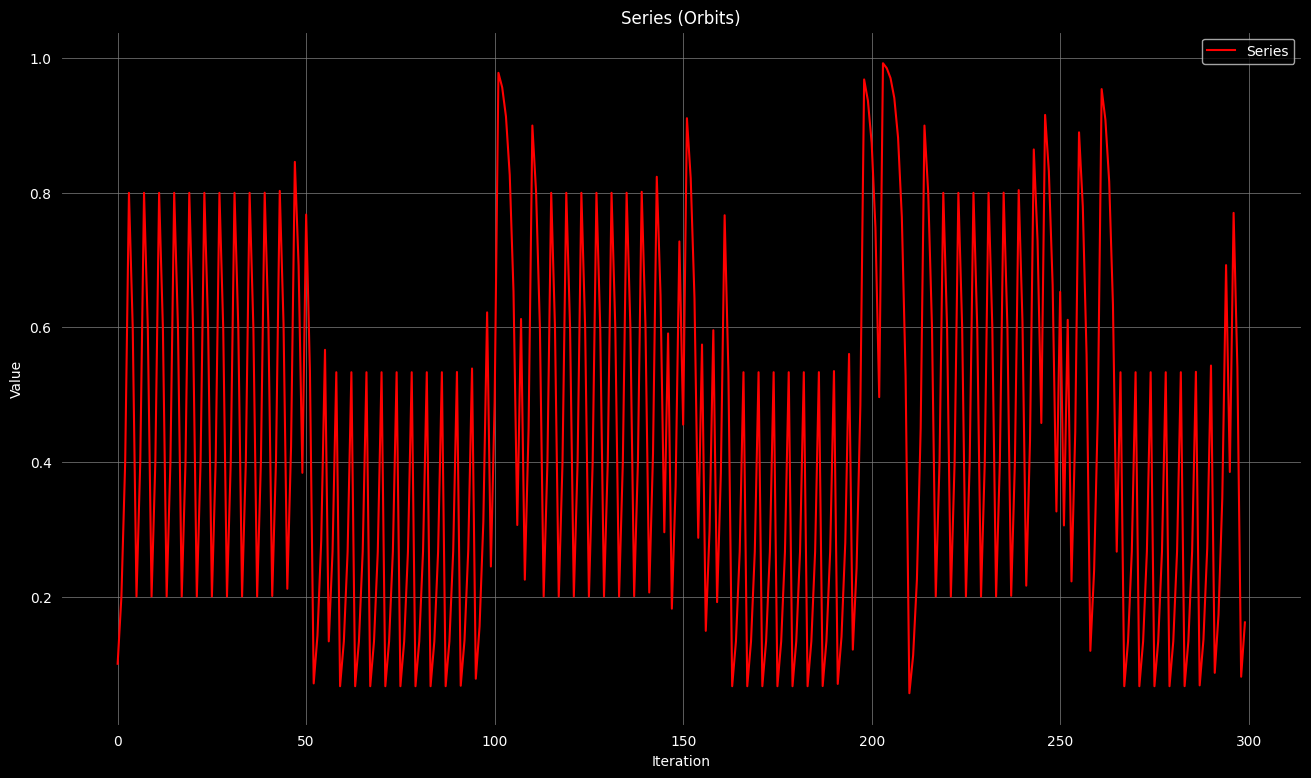

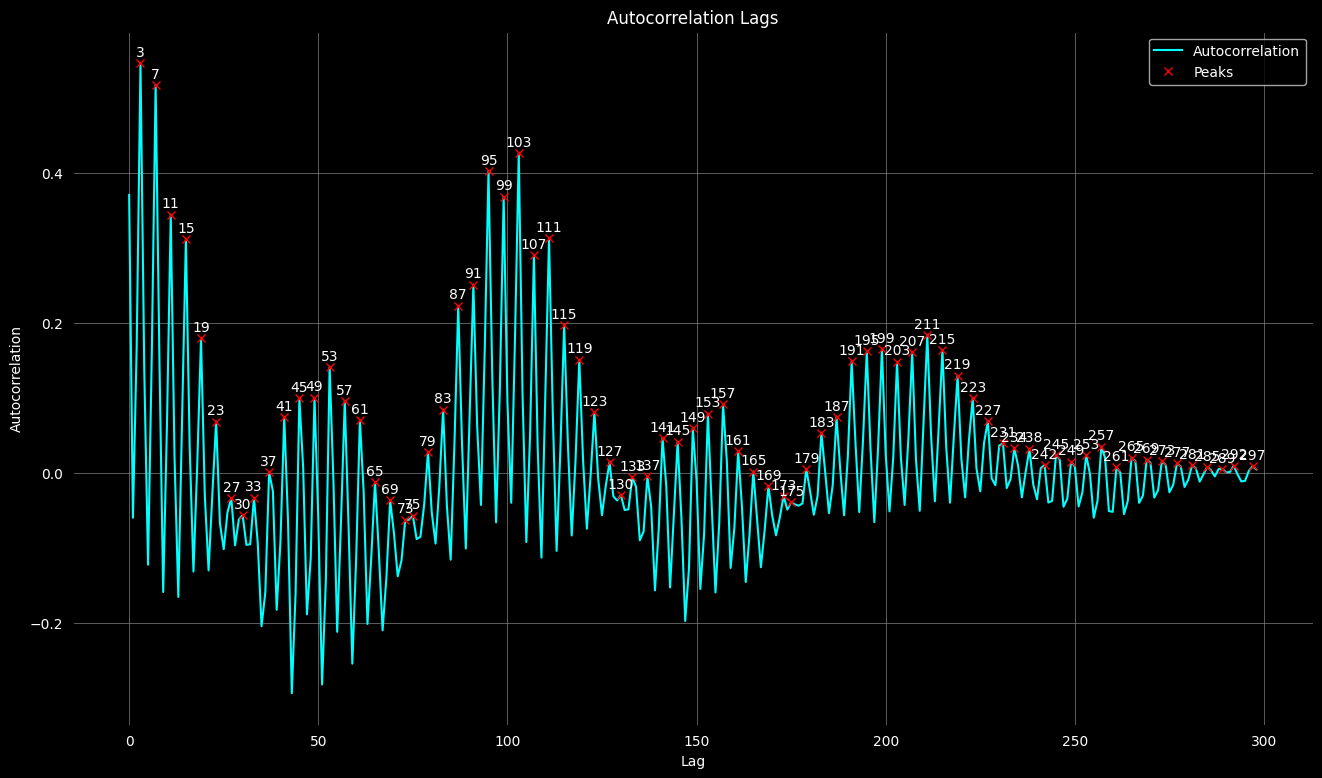

In [335]:
plot_autocorrelation_with_peaks(p=0.1, q=1, K=1, num_iterations=60*5, delta=0.5*(1+np.sqrt(2))*10**(-15))

In [336]:
orbits

array([0.61803399, 0.23606798, 0.47213595, 0.94427191, 0.88854382,
       0.77708764, 0.55417528, 0.10835056, 0.21670112, 0.43340224,
       0.86680448, 0.73360896, 0.46721792, 0.93443584, 0.86887168,
       0.73774336, 0.47548671, 0.95097343, 0.90194685, 0.80389371,
       0.60778741, 0.21557482, 0.43114964, 0.86229928, 0.72459856,
       0.44919713, 0.89839426, 0.79678851, 0.59357702, 0.18715405,
       0.3743081 , 0.74861619, 0.49723238, 0.99446477, 0.98892954,
       0.97785908, 0.95571815, 0.9114363 , 0.8228726 , 0.64574521,
       0.29149042, 0.58298084, 0.16596168, 0.33192336, 0.66384672,
       0.32769344, 0.65538688, 0.31077375, 0.6215475 , 0.24309501,
       0.48619002, 0.97238004, 0.94476007, 0.88952014, 0.77904029,
       0.55808058, 0.11616115, 0.23232231, 0.46464461, 0.92928922,
       0.85857844, 0.71715688, 0.43431377, 0.86862754, 0.73725508,
       0.47451015, 0.9490203 , 0.8980406 , 0.79608121, 0.59216241,
       0.18432482, 0.36864964, 0.73729929, 0.47459858, 0.94919

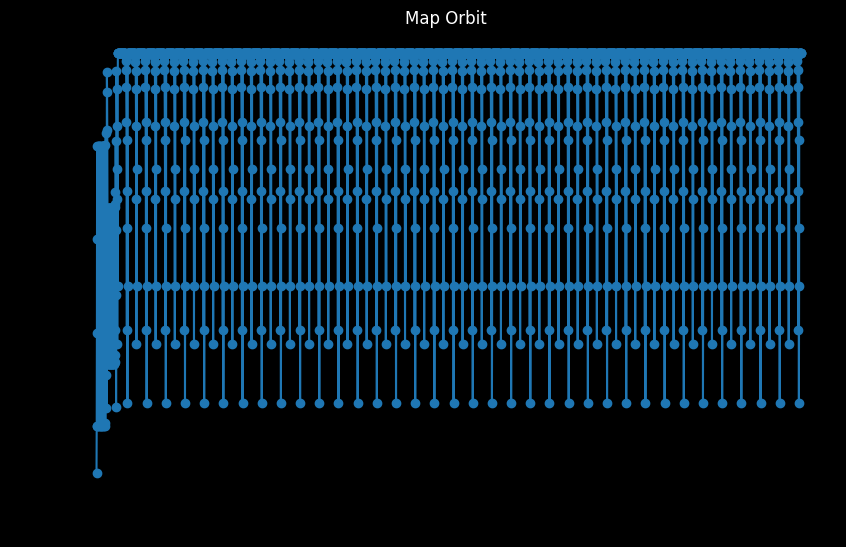

In [346]:

# Example parameters
p = 0.1
q = 1
K = 1
num_iterations = 60*60
# Compute and plot the orbits
orbits = compute_orbits(p, q, K, num_iterations)
plot_orbits(orbits)

In [347]:
orbits

array([0.1, 0.2, 0.4, ..., 1. , 1. , 1. ])

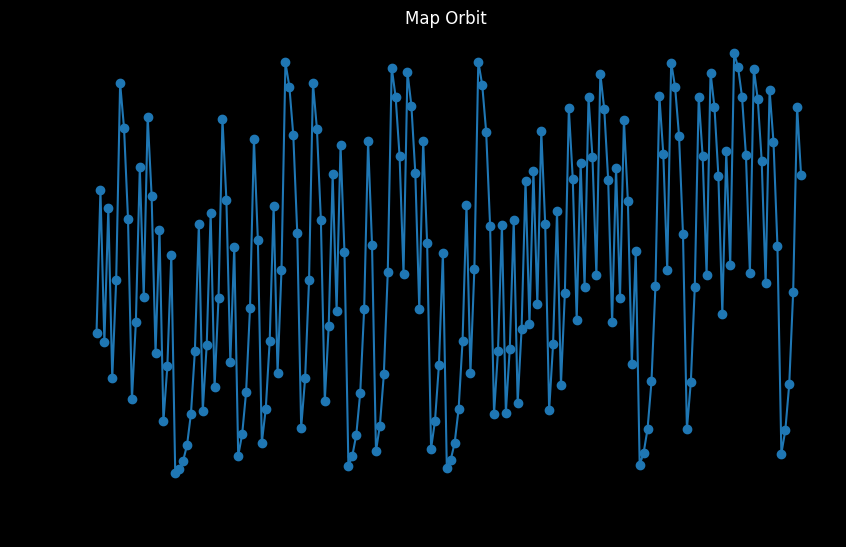

In [339]:

# Example parameters
p = 0.32651616
q = 1
K = 1
num_iterations = 60*3

# Compute and plot the orbits
orbits = compute_orbits(p, q, K, num_iterations)
plot_orbits(orbits)

In [340]:
orbits

array([0.32651616, 0.65303232, 0.30606464, 0.61212928, 0.22425856,
       0.44851712, 0.89703424, 0.79406848, 0.58813696, 0.17627392,
       0.35254784, 0.70509568, 0.41019136, 0.82038272, 0.64076544,
       0.28153088, 0.56306176, 0.12612352, 0.25224704, 0.50449408,
       0.00898816, 0.01797632, 0.03595264, 0.07190528, 0.14381057,
       0.28762113, 0.57524227, 0.15048454, 0.30096907, 0.60193814,
       0.20387628, 0.40775257, 0.81550513, 0.63101027, 0.26202054,
       0.52404108, 0.04808215, 0.09616431, 0.19232862, 0.38465723,
       0.76931447, 0.53862894, 0.07725788, 0.15451575, 0.30903151,
       0.61806302, 0.23612604, 0.47225207, 0.94450415, 0.8890083 ,
       0.7780166 , 0.55603319, 0.11206638, 0.22413276, 0.44826552,
       0.89653104, 0.79306208, 0.58612416, 0.17224833, 0.34449665,
       0.68899331, 0.37798661, 0.75597323, 0.51194645, 0.02389291,
       0.04778582, 0.09557164, 0.19114328, 0.38228656, 0.76457312,
       0.52914623, 0.05829246, 0.11658493, 0.23316985, 0.46633